In [15]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import idx2numpy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
data = pd.read_csv("numbers.csv")
data = data.drop(columns=['Unnamed: 0'], axis=1)
data = data[data["label"]!="X"]
data['label'] = data['label'].astype(int)
data

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.890196,0.615686,0.0,0.0,0.462745,1.0,4
1,1.0,1.0,1.0,1.0,0.980392,0.890196,0.890196,0.890196,0.890196,0.890196,...,1.000000,1.000000,0.717647,0.019608,0.000000,0.0,0.0,0.572549,1.0,7
2,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,0.462745,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,7
3,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.337255,0.917647,0.917647,1.0,1.0,1.000000,1.0,2
4,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,0.976471,0.862745,0.862745,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.521569,0.941176,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,6
789,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,0.925490,0.784314,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,3
790,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.0,0
791,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,0.784314,0.262745,...,0.062745,0.698039,0.917647,1.000000,1.000000,1.0,1.0,1.000000,1.0,9


In [3]:
## MNist dataset
train_x = idx2numpy.convert_from_file("train-images.idx3-ubyte")
train_labels = idx2numpy.convert_from_file("train-labels.idx1-ubyte")
test_x = idx2numpy.convert_from_file("t10k-images.idx3-ubyte")
test_labels = idx2numpy.convert_from_file("t10k-labels.idx1-ubyte")
class_names = list(set(train_labels))

In [4]:
def show_images(train_images, class_names, train_labels, nb_samples = 12, nb_row = 4):
    plt.figure(figsize=(12, 12))
    for i in range(nb_samples):
        plt.subplot(nb_row, nb_row, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i]])
    plt.show()

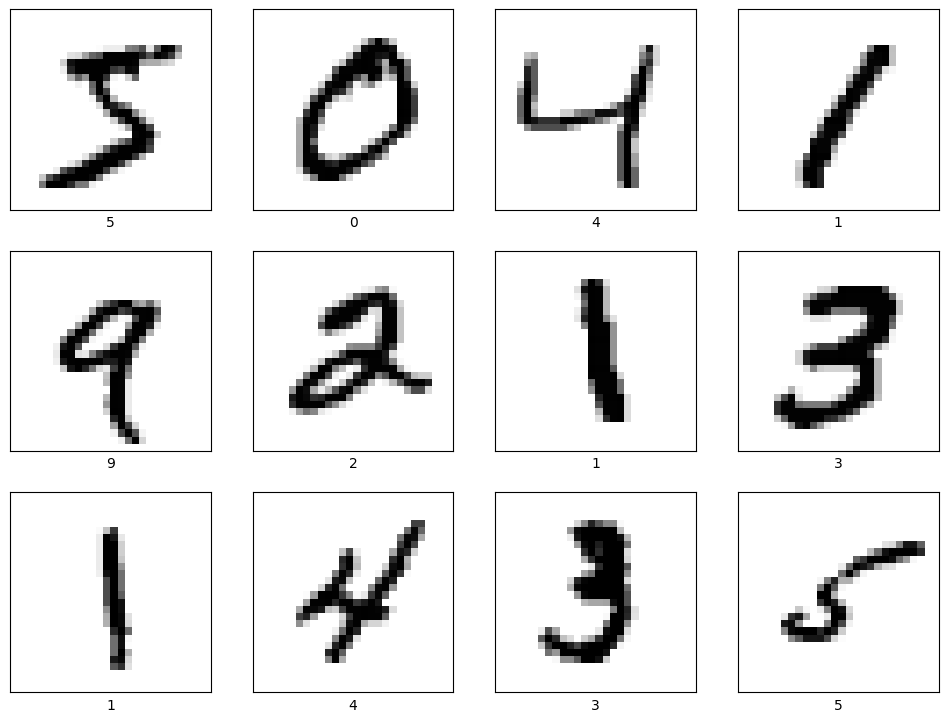

In [5]:
show_images(train_x, class_names, train_labels)

In [7]:
## Se normalizan los datos
max_pixel_value = 255
train_images = train_x / max_pixel_value
test_images = test_x / max_pixel_value

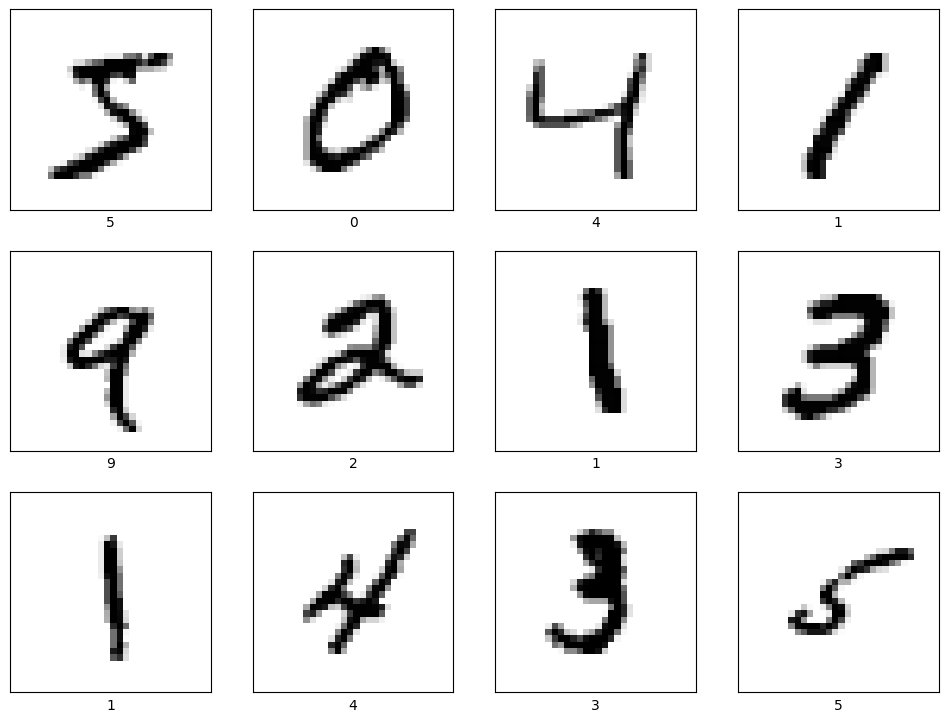

In [8]:
# Las imagenes son 28x28 y las vamos a ampliar 32x32 porque asi debe ser la estructura del input para LeNet 5
train_images = np.pad(train_images, ((0,0),(2,2), (2,2)), 'constant', constant_values =0)
test_images = np.pad(test_images, ((0,0),(2,2), (2,2)), 'constant', constant_values =0)
show_images(train_images, class_names, train_labels)

In [9]:
train_labels = to_categorical(train_labels, len(class_names))
test_labels = to_categorical(test_labels, len(class_names))

In [10]:
# Variables
INPUT_SHAPE = (32,32,1)
FILTER1_SIZE = 6
FILTER2_SIZE = 16
FILTER_SHAPE = (5, 5)
POOL_SHAPE = (2, 2)
FULLY_CONNECT_NUM = 128
NUM_CLASSES = len(class_names)

# Model architecture implementation
model = Sequential()
model.add(Conv2D(FILTER1_SIZE, FILTER_SHAPE,activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Conv2D(FILTER2_SIZE, FILTER_SHAPE, activation='relu'))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Flatten())
model.add(Dense(FULLY_CONNECT_NUM, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 128)               5

In [11]:
BATCH_SIZE = 32
EPOCHS = 50

METRICS = metrics=['accuracy',
               	Precision(name='precision'),
               	Recall(name='recall')]

model.compile(optimizer='adam',
          	loss='categorical_crossentropy',
          	metrics = METRICS)

# Train the model
training_history = model.fit(train_images, train_labels,
                	epochs=EPOCHS, batch_size=BATCH_SIZE,
                	validation_data=(test_images, test_labels))

Epoch 1/50
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1760 - accuracy: 0.9469 - precision: 0.9678 - recall: 0.9306 - val_loss: 0.0668 - val_accuracy: 0.9777 - val_precision: 0.9805 - val_recall: 0.9756
Epoch 2/50
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0595 - accuracy: 0.9815 - precision: 0.9839 - recall: 0.9795 - val_loss: 0.0426 - val_accuracy: 0.9863 - val_precision: 0.9875 - val_recall: 0.9839
Epoch 3/50
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0426 - accuracy: 0.9869 - precision: 0.9883 - recall: 0.9859 - val_loss: 0.0761 - val_accuracy: 0.9771 - val_precision: 0.9792 - val_recall: 0.9757
Epoch 4/50
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0326 - accuracy: 0.9895 - precision: 0.9905 - recall: 0.9888 - val_loss: 0.0290 - val_accuracy: 0.9914 - val_precision: 0.9925 - val_recall: 0.9907
Epoch 5/50
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0242 - a

In [48]:
def show_performance_curve(training_result, metric, metric_label):
    
	train_perf = training_result.history[str(metric)]
	validation_perf = training_result.history['val_'+str(metric)]
	intersection_idx = np.argwhere(np.isclose(train_perf,
                                            	validation_perf, atol=1e-2)).flatten()[0]
	intersection_value = train_perf[intersection_idx]
    
	plt.plot(train_perf, label="Training "+str(metric))
	plt.plot(validation_perf, label = 'Testing '+str(metric))
	plt.axvline(x=intersection_idx, color='r', linestyle='--', label='Intersection')
    
	plt.annotate(f'Optimal Value: {intersection_value:.4f}',
         	xy=(intersection_idx, intersection_value),
         	xycoords='data',
         	fontsize=10,
         	color='green')
            	 
	plt.xlabel('Epoch')
	plt.ylabel(metric_label)
	plt.legend(loc='lower right')

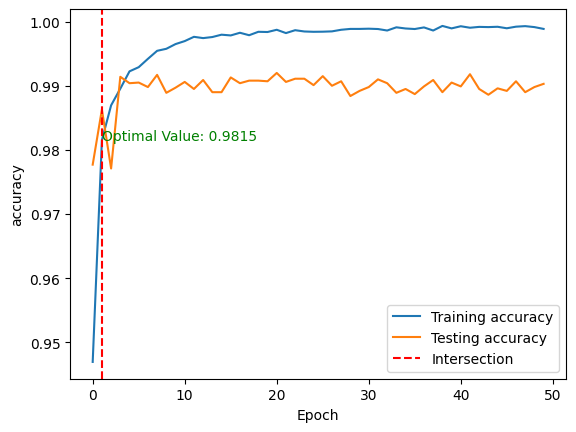

In [49]:
show_performance_curve(training_history, 'accuracy', 'accuracy')

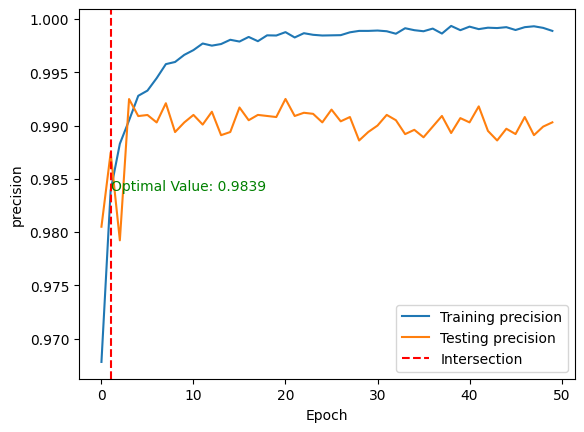

In [50]:
show_performance_curve(training_history, 'precision', 'precision')

313/313 [==============================] - 2s 7ms/step


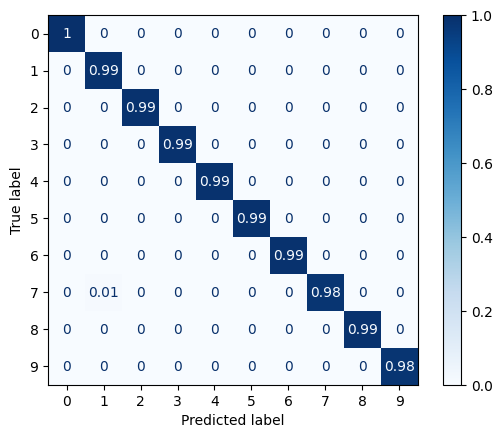

In [35]:
test_predictions = model.predict(test_images)
test_predicted_labels = np.argmax(test_predictions, axis=1)
test_true_labels = np.argmax(test_labels, axis=1)
cm = confusion_matrix(test_true_labels, test_predicted_labels)
cm2 = np.zeros(cm.shape)
for i in range(len(cm)):
    cm2[i,:] = np.round(cm[i]/np.sum(cm[i]),2)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm2)
cmd.plot(include_values=True, cmap='Blues', ax=None, xticks_rotation='horizontal')
plt.show()

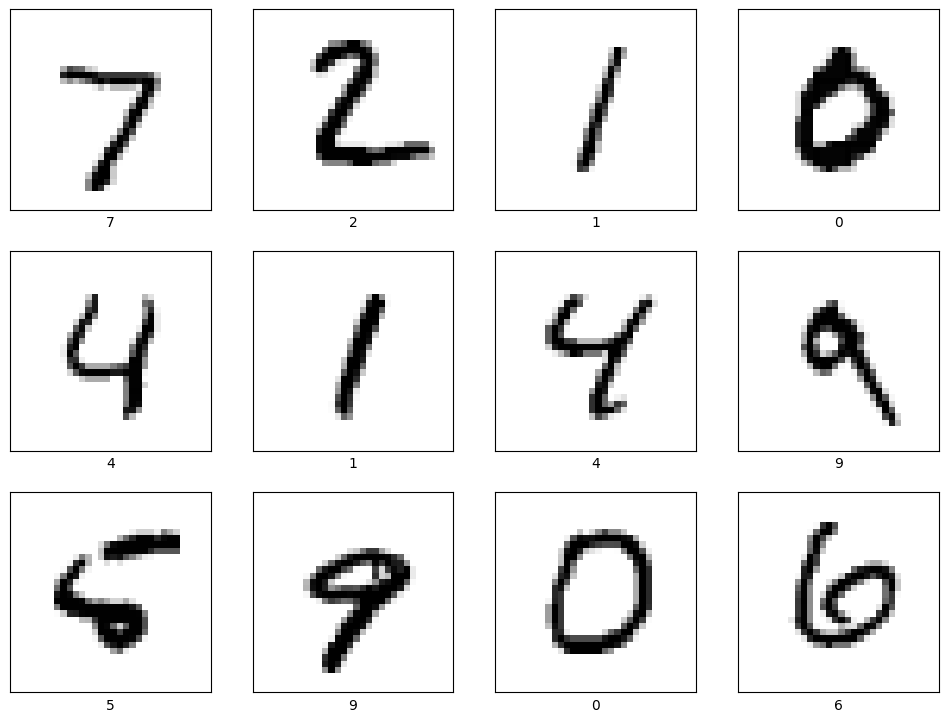

In [27]:
show_images(test_images, class_names,test_predicted_labels)

In [38]:
validation= data.iloc[:,:-1].values
validation = validation.reshape(validation.shape[0],28, 28)

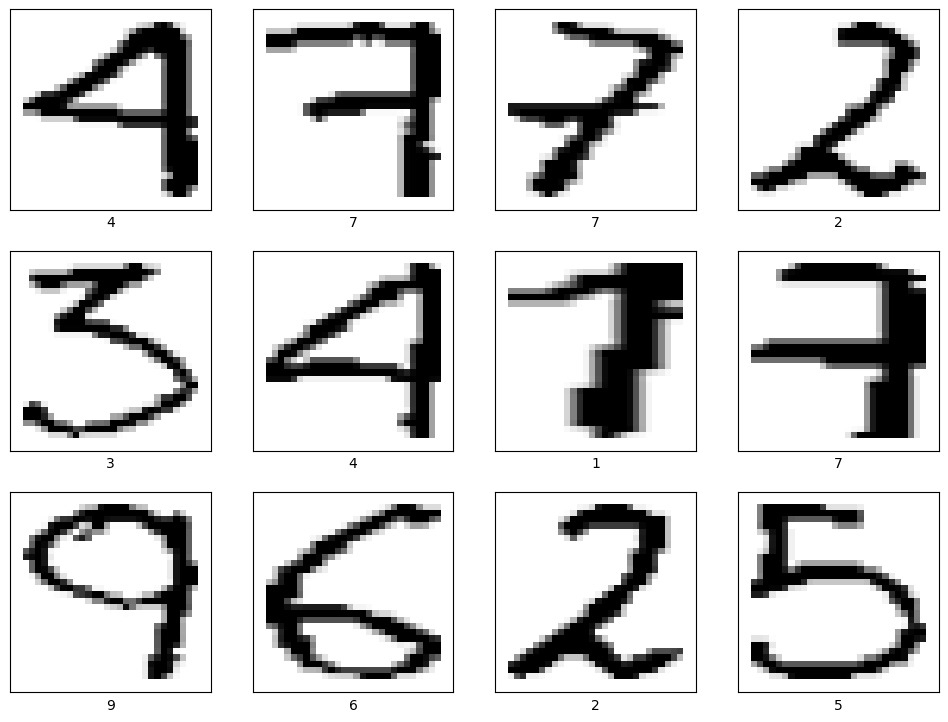

In [39]:
validation_images =  (1-validation) / 1
validation_images = np.pad(validation_images, ((0,0),(2,2), (2,2)), 'constant', constant_values =0)
show_images(validation_images, class_names, data.iloc[:,-1].values)

23/23 [==============================] - 0s 6ms/step


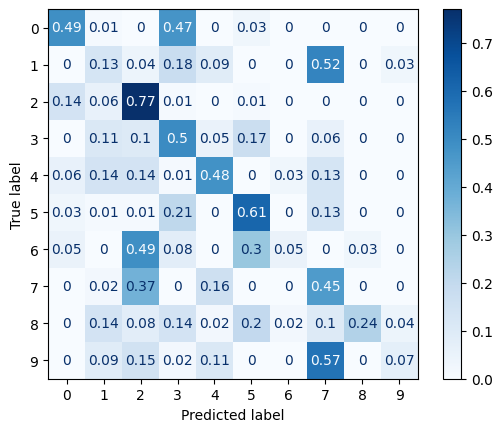

In [42]:
validation_predictions = model.predict(validation_images)
validation_predicted_labels = np.argmax(validation_predictions, axis=1)
validation_true_labels = np.argmax(to_categorical(data.iloc[:,-1].values, len(class_names)), axis=1)
cm = confusion_matrix(validation_true_labels, validation_predicted_labels)
cm2 = np.zeros(cm.shape)
for i in range(len(cm)):
    cm2[i,:] = np.round(cm[i]/np.sum(cm[i]),2)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm2)
cmd.plot(include_values=True, cmap='Blues', ax=None, xticks_rotation='horizontal')
plt.show()

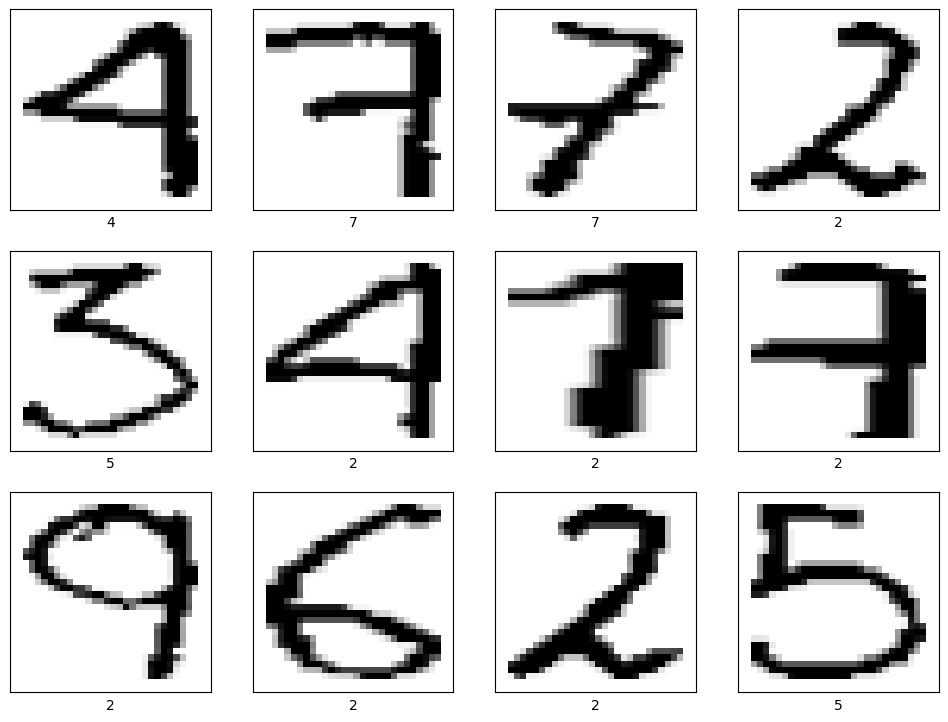

In [44]:
show_images(validation_images,class_names,validation_predicted_labels)